# Problem Statement: Market Risk Analysis

### The dataset contains 6 years of information(weekly stock information) on the stock prices of 10 different Indian Stocks. Calculate the mean and standard deviation on the stock returns and share insights. You are expected to do the Market Risk Analysis.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns 
color = sns.color_palette()
import sklearn.metrics as metrics
from scipy.stats import norm 

import warnings
warnings.filterwarnings("ignore")

In [3]:
stock_prices = pd.read_csv('E:\GL\Course Content\FRA\ML 2\Market+Risk+Dataset.csv')

#Glimpse of Data
stock_prices.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [4]:
stock_prices.columns = stock_prices.columns.str.replace(' ', '_')
stock_prices.head()

,Date,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [5]:
print('The number of rows (observations) is',stock_prices.shape[0],'\n''The number of columns (variables) is',stock_prices.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


In [6]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian_Hotel         314 non-null    int64 
 3   Mahindra_&_Mahindra  314 non-null    int64 
 4   Axis_Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree_Cement         314 non-null    int64 
 7   Sun_Pharma           314 non-null    int64 
 8   Jindal_Steel         314 non-null    int64 
 9   Idea_Vodafone        314 non-null    int64 
 10  Jet_Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [7]:
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]

In [8]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 314 non-null    object        
 1   Infosys              314 non-null    int64         
 2   Indian_Hotel         314 non-null    int64         
 3   Mahindra_&_Mahindra  314 non-null    int64         
 4   Axis_Bank            314 non-null    int64         
 5   SAIL                 314 non-null    int64         
 6   Shree_Cement         314 non-null    int64         
 7   Sun_Pharma           314 non-null    int64         
 8   Jindal_Steel         314 non-null    int64         
 9   Idea_Vodafone        314 non-null    int64         
 10  Jet_Airways          314 non-null    int64         
 11  dates                314 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 29.6+ KB


In [9]:
stock_prices.head(314)

,Date,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways,dates
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278,2014-03-31
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303,2014-07-04
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280,2014-04-14
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282,2014-04-21
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243,2014-04-28
...,...,...,...,...,...,...,...,...,...,...,...,...
309,02-03-2020,729,120,469,658,33,23110,401,146,3,22,2020-02-03
310,09-03-2020,634,114,427,569,30,21308,384,121,6,18,2020-09-03
311,16-03-2020,577,90,321,428,27,18904,365,105,3,16,2020-03-16
312,23-03-2020,644,75,293,360,21,17666,338,89,3,14,2020-03-23


In [10]:
stock_prices.isna().sum().sum()

0

In [11]:
stock_prices.duplicated().sum()

0

No Null Values. However, Date Variable is seen as object which needs to be corrected.

In [12]:
stock_prices.describe().T

,count,mean,std,min,25%,50%,75%,max
Infosys,314.0,511.340764,135.952051,234.0,424.00,466.5,630.75,810.0
Indian_Hotel,314.0,114.560510,22.509732,64.0,96.00,115.0,134.00,157.0
Mahindra_&_Mahindra,314.0,636.678344,102.879975,284.0,572.00,625.0,678.00,956.0
Axis_Bank,314.0,540.742038,115.835569,263.0,470.50,528.0,605.25,808.0
SAIL,314.0,59.095541,15.810493,21.0,47.00,57.0,71.75,104.0
Shree_Cement,314.0,14806.410828,4288.275085,5543.0,10952.25,16018.5,17773.25,24806.0
Sun_Pharma,314.0,633.468153,171.855893,338.0,478.50,614.0,785.00,1089.0
Jindal_Steel,314.0,147.627389,65.879195,53.0,88.25,142.5,182.75,338.0
Idea_Vodafone,314.0,53.713376,31.248985,3.0,25.25,53.0,82.00,117.0
Jet_Airways,314.0,372.659236,202.262668,14.0,243.25,376.0,534.00,871.0


### 2.1 Draw Stock Price Graph(Stock Price vs Time) for any 2 given stocks with inference

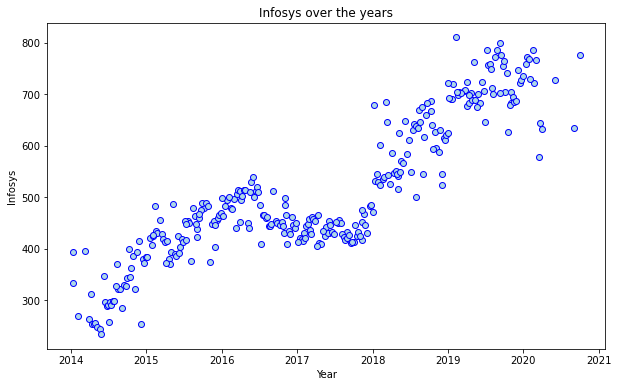

In [39]:
plt.figure(figsize = (10, 6))
plt.scatter(stock_prices['dates'], stock_prices['Infosys'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Infosys')
plt.title('Infosys over the years')
plt.show()

Infosys has seen an uptrend for most of the period for these last 6 years rising from a level of approx 250 to 800. It had slightly dipped in the year 2016 to 2017 and performed flattish from 2017 to 2018 before again gaining upward momentum. we can also notice slight fluctuations in the stock prices between 2020 to 2021 which majorly could be due to the pandemic.

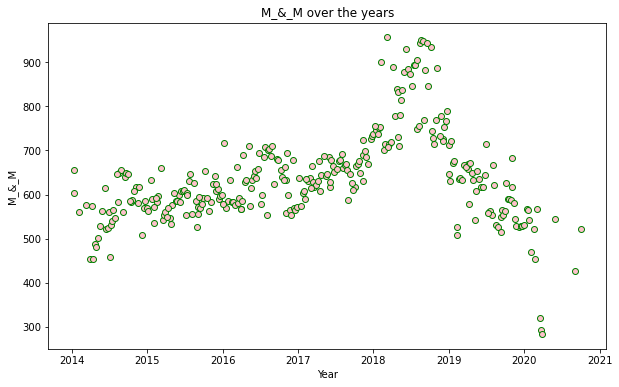

In [40]:
plt.figure(figsize = (10, 6))
plt.scatter(stock_prices['dates'], stock_prices['Mahindra_&_Mahindra'], edgecolors='g', color = 'pink')
plt.xlabel('Year')
plt.ylabel('M_&_M')
plt.title('M_&_M over the years')
plt.show()

Mahindra and Mahindra has seen both upward and downward trends in these last 6 years. The stock price rose steadily between 2014 to 2018 rising from a level of approx 450 to 700 and then suddenly gained a lot of momentum in 1st half of 2018 which helped it climb to touch a high of approx 950 before stumbling down back sharply to levels of as low as 300 in these 2 years from mid 2018 till 2020. The sharp fall in the stock prices between 2020 to 2021 could also have been largely due to the pandemic.

### 2.2 Calculate Returns for all stocks with inference

Steps for calculating returns from prices on a weekly basis:
- Take logarithms
- Take differences

In [15]:
stock_returns = np.log(stock_prices.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1) 

In [16]:
stock_returns.shape

(314, 10)

In [17]:
pd.set_option('display.max_rows', None)
stock_returns

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846
5,-0.031749,-0.015504,0.040656,0.061875,0.061558,0.011400,-0.008217,0.024898,0.012579,-0.016598
6,0.019961,0.060625,0.011881,0.076961,0.112795,0.067622,-0.016639,0.097543,0.048790,0.020705
7,-0.036221,0.199333,0.038615,0.059898,0.136859,0.056790,-0.049881,0.105732,-0.024098,0.169258
8,-0.041847,-0.012121,0.064183,-0.014642,-0.023530,0.048090,0.044835,-0.010084,-0.012270,-0.181630
9,0.135666,0.081917,-0.003559,0.071154,0.213574,0.105167,-0.018724,0.132686,0.024391,0.072031


In [41]:
stock_returns.head()

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846


In [42]:
stock_returns.tail()

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
309,0.009649,-0.110348,0.030305,-0.057580,-0.087011,0.023688,0.072383,-0.053346,-0.287682,-0.127833
310,-0.139625,-0.051293,-0.093819,-0.145324,-0.095310,-0.081183,-0.043319,-0.187816,0.693147,-0.200671
311,-0.094207,-0.236389,-0.285343,-0.284757,-0.105361,-0.119709,-0.050745,-0.141830,-0.693147,-0.117783
312,0.109856,-0.182322,-0.091269,-0.173019,-0.251314,-0.067732,-0.076851,-0.165324,0.000000,-0.133531
313,-0.017228,0.000000,-0.031198,0.051432,0.090972,-0.006816,0.040585,-0.081917,0.000000,0.000000


The above details are the difference in the stock prices on a weekly basis in top to bottom approach. Hence, the 1st row has no value in it as there is no stock price difference data for the previous week. 

The log values represent the drop or rise in the stock prices on a weekly basis.

Wherever, the subsequent row has a negative log value, it suggests that the stock price had fallen from its previous week.
Wherever, the subsequent row has a positive log value, it suggests that the stock price had risen from its previous week
Wherever, the subsequent row has a 0 log value, it suggests that there was no change in the stock price from its previous week.

### 2.3 Calculate Stock Means and Standard Deviation for all stocks with inference

#### We now look at Means & Standard Deviations of these returns

- Stock Means: Average returns that the stock is making on a week to week basis
- Stock Standard Deviation : It is a measure of volatility meaning the more a stock's returns vary from the stock's average return, the more volatile the stock

#### Calculating stock means (Descending Order)

In [18]:
stock_means = stock_returns.mean(axis = 0)
stock_means.sort_values(ascending=False)

Shree_Cement           0.003681
Infosys                0.002794
Axis_Bank              0.001167
Indian_Hotel           0.000266
Sun_Pharma            -0.001455
Mahindra_&_Mahindra   -0.001506
SAIL                  -0.003463
Jindal_Steel          -0.004123
Jet_Airways           -0.009548
Idea_Vodafone         -0.010608
dtype: float64

Shree Cement has given the highest average returns when compared on a week on week basis during these 6 years followed by Infosys in 2nd & Axis_Bank in 3rd Spot and Indian Hotel in 4th. These 4 stocks have given a positive return on an average.

Sun Pharma, Mahindra & Mahindra, SAIL, Jindal Steel, Jet Airways & Idea Vodafone all have given negative average weekly returns during these 6 years with Idea Vodafone giving the lowest returns to their shareholders followed by Jet Airways in 2nd and Jindal Steel in 3rd place.

#### Calculating stock standard deviation (Descending Order)

In [19]:
stock_sd = stock_returns.std(axis = 0)
stock_sd.sort_values(ascending=False)

Idea_Vodafone          0.104315
Jet_Airways            0.097972
Jindal_Steel           0.075108
SAIL                   0.062188
Indian_Hotel           0.047131
Axis_Bank              0.045828
Sun_Pharma             0.045033
Mahindra_&_Mahindra    0.040169
Shree_Cement           0.039917
Infosys                0.035070
dtype: float64

Idea Vodafone is the most volatile stock w.r.t weekly returns in these 6 years followed by Jet Airways in 2nd and Jindal Steel in 3rd place. Whereas, Infosys is the least volatile stock followed by Shree Cement in 2nd and Mahindra & Mahindra in 3rd place.

### 2.4 Draw a plot of Stock Means vs Standard Deviation and state your inference

In [20]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
df

,Average,Volatility
Infosys,0.002794,0.035070
Indian_Hotel,0.000266,0.047131
Mahindra_&_Mahindra,-0.001506,0.040169
Axis_Bank,0.001167,0.045828
SAIL,-0.003463,0.062188
Shree_Cement,0.003681,0.039917
Sun_Pharma,-0.001455,0.045033
Jindal_Steel,-0.004123,0.075108
Idea_Vodafone,-0.010608,0.104315
Jet_Airways,-0.009548,0.097972


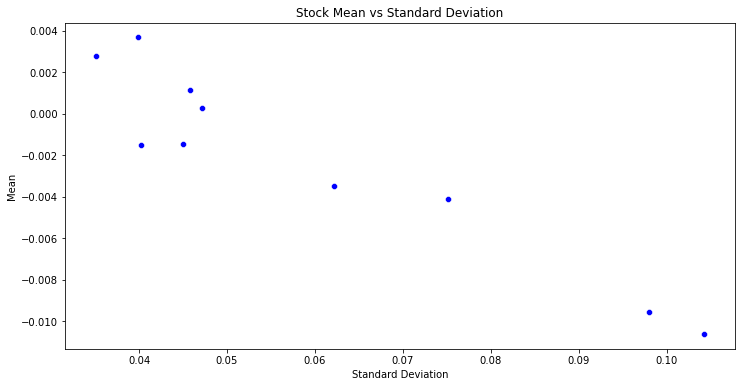

In [26]:
plt.figure(figsize=(12,6))
plot = sns.scatterplot(df['Volatility'], df['Average'],edgecolors='b',color = 'blue')
plt.xlabel('Standard Deviation')
plt.ylabel('Mean')
plt.title('Stock Mean vs Standard Deviation')
plt.show()

The above plot helps to give a glimpse of the risk to reward charateristics of the stocks.

There are a few stocks such as Infosys, Shree Cement, Indian Hotel which have provided better returns comparitively at lower standard deviations. 

Also, there are some stocks such as Mahindra & Mahindra, Sun Pharma and Axis Bank which are less risky but have performed poorly when it comes to generating returns.

Then, there are stocks such as Jindal Steel and SAIL which are moderately risky but do not generate enough returns as well. 

Whereas, there a stocks such as Idea Vodafone and Jet Airways which are highly risky but which also end up generating the least returns.

#### We now try and compare the stocks w.r.t to their average means and average std deviations

In [27]:
stock_means.mean()

-0.0022793178008050996

In [28]:
stock_sd.mean()

0.059273095441651116

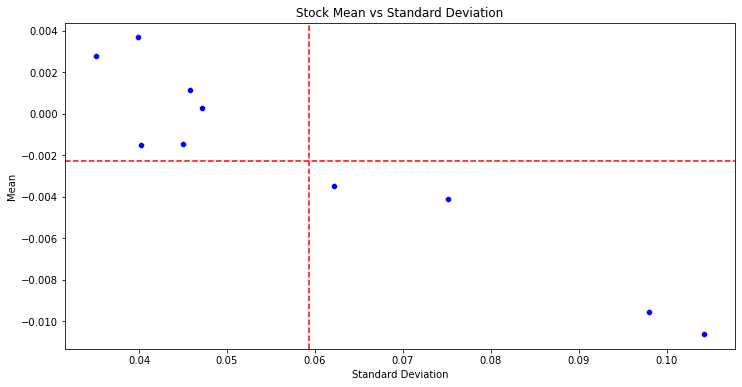

In [32]:
plt.figure(figsize=(12,6))
plot = sns.scatterplot(df['Volatility'], df['Average'],edgecolors='b',color = 'blue')
plot.axvline(x=0.059273,linestyle='--', color = "red")
plot.axhline(y=-0.002279,linestyle='--', color = "red")
plt.xlabel('Standard Deviation')
plt.ylabel('Mean')
plt.title('Stock Mean vs Standard Deviation')
plt.show()

As we can see from above,  the stocks on the left side of the red dotted line on std deviation axis and above the red dotted line on the mean axis are the stocks that can be considered for investment from these 10 stocks to gain returns more than the average for this portfolio alone and these stocks can be further narrowed down basis the one's that provide higher returns or lower standard deviations depending on the investors stck investing preference. 

### 2.5 Conclusion and Recommendations

- Probability of Return and Risk to achieve this return is something that every investor should calculate before making an important investment decision. The above steps work as a guideline to make those calculations given that the data is available and accurate.  

- An apt portfolio for any investor should be able to generate high returns but at a lower volatility to increase the probability of not making losses/secure capital in the long run.

- Average Returns and Standard Deviation are very important characteristics of any stock's health and should be given a prority while making stock selections or even diversifying one's portfolio.

- Investors should refrain from stocks such as or similar to Idea Vodafone & Jet Airways (high volatile - low return stocks) or sell them if they are part of the portfolio and instead add stocks such as or similar to Infosys, Shree Cement, Indian Hotel (low volatile - high return stocks) instead.

- If you have high return high volatile stocks already in your portfolio then you can consider adding Axis Bank for low risk low return stock in the portfoio to reduce/balance the risk of your portfolio without expecting too much returns, simply for diversification purpose.

- Mahindra & Mahindra and Sun Pharma can be tracked for further few years w.r.t returns and volatility and in case of improvements in returns, they can also be good buying opportunities to reduce/balance the risk of an investors portfolio.

- Jindal Steel and SAIL also must be avoided unless they appear in the top left of the figure .... after which they can be a part of an investors watchlist who is looking at opportunities in the metals sector especially in steel industry.

# The End